## 1. Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Import the dataset

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## 3. Create Independent Variable

In [7]:
X = df.iloc[:,:-1].values

## 4. Create Dependent Variable

In [11]:
y = df.iloc[:,-1].values

## 5. Missing Values

### Check for missing values in dataframe

In [13]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## 6. Split the dataset into Training set and test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [24]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

20 10 20 10


## 7. Fit Simple Linear Regression to the Training Set

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor = LinearRegression()

In [31]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 8. Predict the Test set results

In [36]:
y_predict = regressor.predict(X_test)

In [37]:
y_predict

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [38]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

## 9. Visualize the Training set

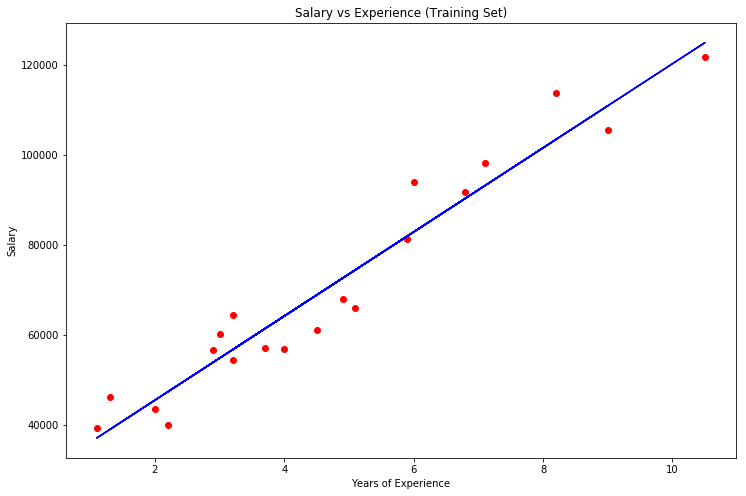

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## 10. Visualize the Test set

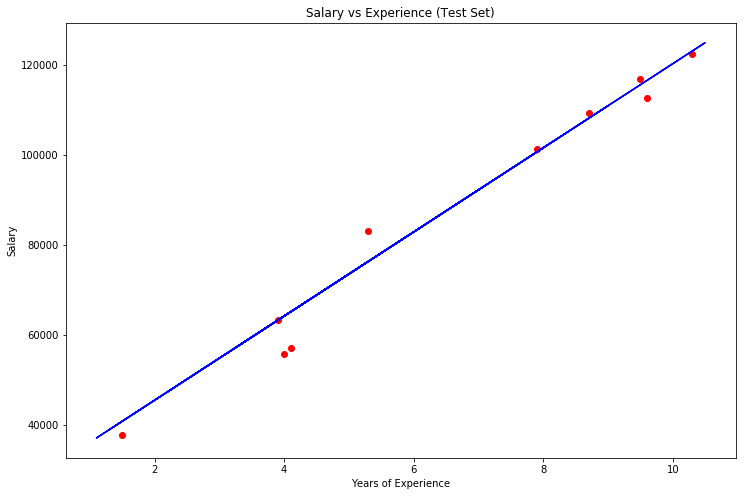

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test,color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## 11. Evaluate the model

In [70]:
print('The intercept is:', regressor.intercept_)

The intercept is: 26816.19224403119


In [71]:
print('The coefficient is:', regressor.coef_)

The coefficient is: [9345.94244312]


In [72]:
r_sq = regressor.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9749154407708353
